In [100]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
import scipy

## Data description

The original dataset contains data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

Around 77% of the original dataset was synthetically generated by the author, and can be seen in the original file.

For the purposes of EDA I decided to crop out the synthetically generated data, as the original survey data is sufficient.

The last column a class variable was calculated based on BMI index $ { Weight \over Height * Height} $ and then compared to WHO data and Mexican normativity.

#### Data Dictionary

|Variable|Definition|Key|
|:-------|:-------|:--------|
|Gender|Gender|male, female|
|Age|age||
|Height|Height||
|Weight|Weight||
|family_history_with_overweight|Has a family member suffered or suffers from overweight?|Yes, No|
|favc|Frequent consumption of high calorie food|yes, no|
|fcvc|Frequency of consumption of vegetables|1 = Never, 2 = Sometimes, 3 = Always|
|ncp|Number of main meals (per day)|1 = Between 1 and 2 main meals, 3 = Three main meals, 4 = More than three main meals|
|caec|Consumption of food between  meals|Sometimes, Frequently, Always, no|
|Smoke|Does the person smoke?|Yes, No|
|CH2O|Water consumption|1 = Less than a liter, 2 = Between 1 and 2 liters, 3 = more than 2 liters|
|SCC|Does the person monitor calorie intake?|Yes, No|
|FAF|Physical activity frequency per week|0 = Non PA, 1 = 1 or 2 days, 2 = betwee 2 and 4 days, 3 = 4 or 5 days|
|TUE|Time using technological devices (cell phone, videogames, TV, PC, etc.) daily|0 = 0-2 hours, 1 = 3-5 hours, 2 = more than 5 hours|
|CALC|How often does the person drinks alcohol|Sometimes, Frequently, Always, no|
|MTRANS|Transportation used|Public_Transportation, Walking, Automobile, Motorbike, Bike|
|NObeyesdad|Class variable based on BMI - weight and height and comporated by WHO Data|Insufficient Weight, Normal Weight, Overweight Level 1, Overweight Level 2, Overweight Level 3|


In [8]:
df = pd.read_csv('obesityresponded.csv', sep=',')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [3]:
with pd.option_context('display.max_columns', None):
  display(df.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [18]:
# first let's check for any NA values
df.isna().sum().sort_values(ascending=False)

Gender                            0
SMOKE                             0
MTRANS                            0
CALC                              0
TUE                               0
FAF                               0
SCC                               0
CH2O                              0
CAEC                              0
Age                               0
NCP                               0
FCVC                              0
FAVC                              0
family_history_with_overweight    0
Weight                            0
Height                            0
NObeyesdad                        0
dtype: int64

In [27]:
# no NA values were in the dataset,
# lets get  a quick summary
numerical_cols = ['Age', 'Height', 'Weight']
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
display(df[numerical_cols].describe())
display(df[categorical_cols].describe())

,Age,Height,Weight
count,498.000000,498.000000,498.000000
mean,23.146586,1.686386,69.569880
std,6.721583,0.097653,17.013226
min,14.000000,1.450000,39.000000
25%,19.000000,1.612500,58.000000
50%,21.000000,1.680000,67.000000
75%,24.000000,1.750000,80.000000
max,61.000000,1.980000,173.000000


,FCVC,NCP,CH2O,TUE
count,498.000000,498.000000,498.000000,498.000000
mean,2.325301,2.658635,1.923695,0.660643
std,0.590504,0.919242,0.678945,0.722794
min,1.000000,1.000000,1.000000,0.000000
25%,2.000000,3.000000,1.000000,0.000000
50%,2.000000,3.000000,2.000000,1.000000
75%,3.000000,3.000000,2.000000,1.000000
max,3.000000,4.000000,3.000000,2.000000


<AxesSubplot: xlabel='Gender', ylabel='count'>

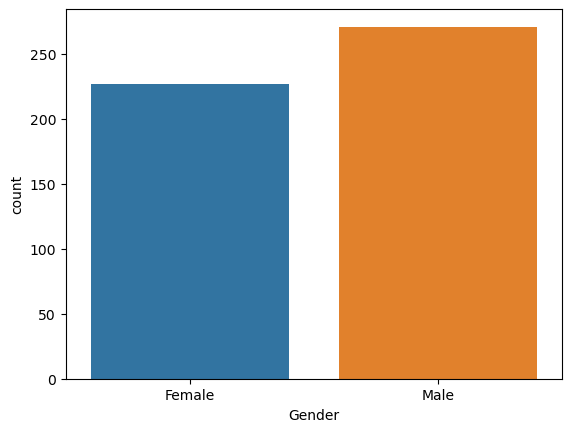

In [28]:
# Check gender diversity of the dataset
sns.countplot(data=df, x='Gender')

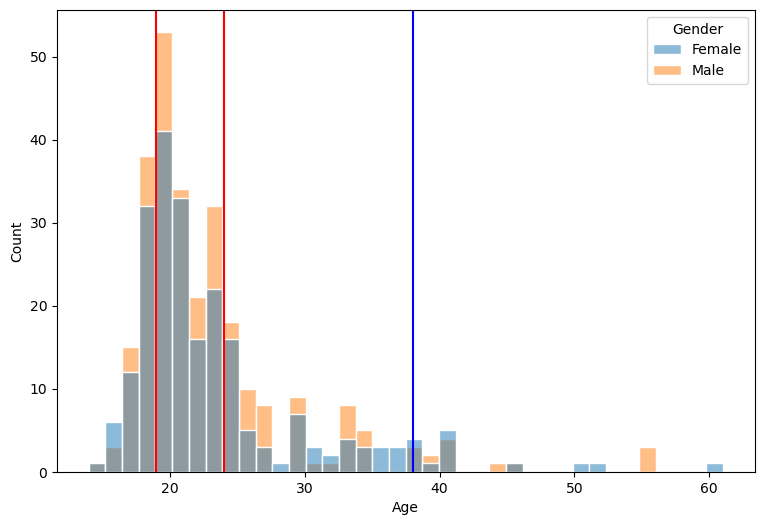

In [39]:
# Check the age of respondents
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Age', hue='Gender', color='green', edgecolor='white')
plt.axvline(df.Age.quantile(0.25), color='red')
plt.axvline(df.Age.quantile(0.75), color='red')
plt.axvline(df.Age.quantile(0.95), color='blue')

### 1. What percentage of respondents (by gender) can be considered overweight?

First, lets add a numerical column to dataset, since `NObeyesdad` can be considered ordinal categorical column, we convert it to a numeric value

In [40]:
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [41]:
ob_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6,
}

In [50]:
df.loc[:, 'BMINum'] = df.apply(lambda r: ob_map.get(r.NObeyesdad), axis=1)

In [65]:
total = df.groupby('Gender').BMINum.count()
overweight = df[df.BMINum > ob_map.get('Normal_Weight')].groupby('Gender').BMINum.count()
df_agg = (overweight / total).reset_index(name='OW')
df_agg.loc[:, 'NonOW'] = 1 - df_agg.OW
df_agg

,Gender,OW,NonOW
0,Female,0.303965,0.696035
1,Male,0.398524,0.601476


<BarContainer object of 2 artists>

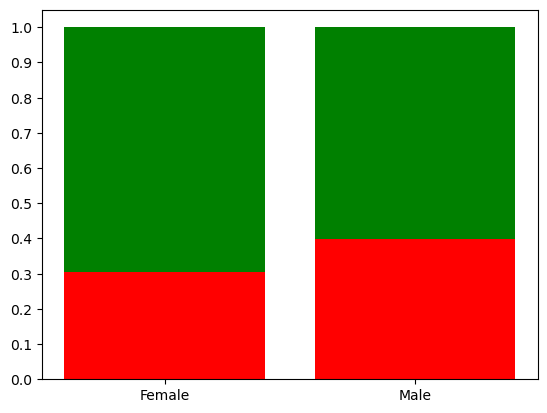

In [79]:
step = 0.1
plt.yticks(np.arange(0, 1.0 + step, step))
plt.bar(df_agg.Gender, df_agg.OW, color='red')
plt.bar(df_agg.Gender, df_agg.NonOW, color='green', bottom=df_ow.OW)

We see that approx 30% of responded females are considered overweight, around 40% of men can be considered overweight.

### 2. Is there any effect caused by gender on BMI?

In [83]:
# First lets calculate BMI
df.loc[:, 'BMI'] = df.apply(lambda x: x.Weight / (x.Height * x.Height), axis=1)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMINum,BMI
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight,1,24.386526
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,1,24.238227
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight,1,23.765432
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I,2,26.851852
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,3,28.342381


In [86]:
df.groupby('Gender').BMI.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,227.0,23.676225,4.472526,15.432099,20.692983,22.758307,25.816449,41.913215
Male,271.0,24.847362,4.954880,13.291588,21.506728,24.280975,27.555116,49.472390


<AxesSubplot: xlabel='Gender', ylabel='BMI'>

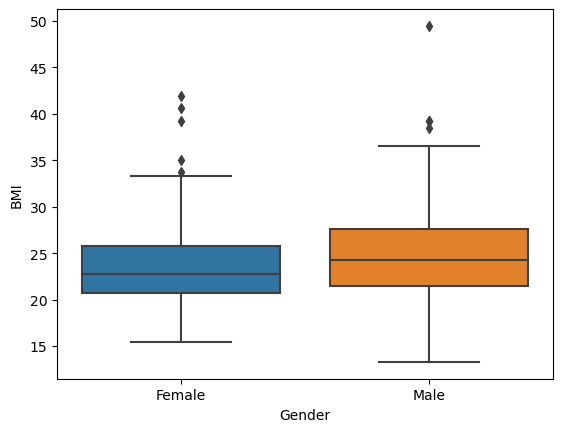

In [84]:
sns.boxplot(data=df, x='Gender', y='BMI')

It seems that females tend to have lower BMI than men with a median value of 22.75 againts 24.29

In [130]:
# mu, std = scipy.stats.norm.fit(df.BMI)
# ax = sns.histplot(data=df, x='BMI', color='lightblue', edgecolor='white', stat='density')

# xx = np.linspace(*ax.get_xlim(), 100)
# ax.plot(xx, scipy.stats.norm.pdf(xx, mu, std));

### 3. Is there any effect on family history of overweight on BMI?

<AxesSubplot: xlabel='family_history_with_overweight', ylabel='count'>

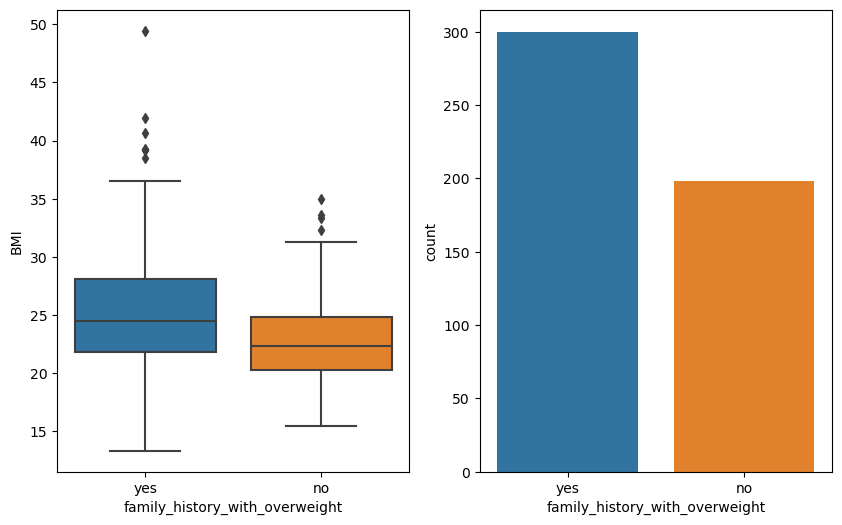

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.boxplot(data=df, x='family_history_with_overweight', y='BMI', ax=axes[0])
sns.countplot(data=df, x='family_history_with_overweight', ax=axes[1])

There seems to be a relation on between family history and BMI, as people having a family history do have a higher median a upper quantile of BMI.
This can be expected since family tend to pass same habits onto children, etc.

### 4. Does monitoring of calorie intake have any effect on weight?

<AxesSubplot: xlabel='SCC', ylabel='count'>

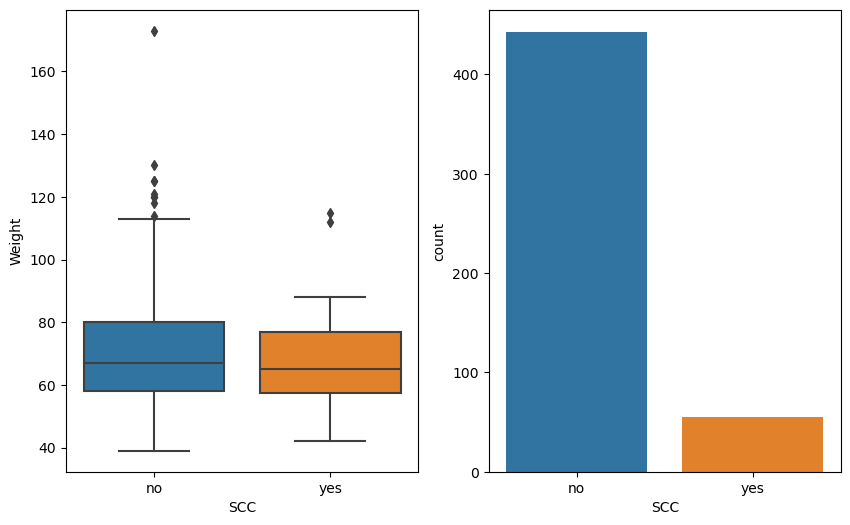

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.boxplot(data=df, x='SCC', y='Weight', ax=axes[0])
sns.countplot(data=df, x='SCC', ax=axes[1])

Even though way less respondents monitor calorie intake, the overall weight seems to be not so much different.

In [137]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMINum,BMI
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight,1,24.386526
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,1,24.238227
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight,1,23.765432
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I,2,26.851852
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,3,28.342381


### 5. Does phyical activity and number of main meals have effect on drinking water?

<AxesSubplot: xlabel='NCP', ylabel='FAF'>

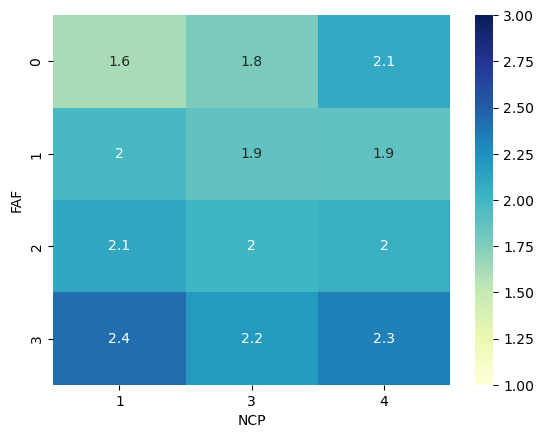

In [149]:
df_agg = df.groupby(['FAF', 'NCP']).CH2O.agg(['mean']).reset_index()
df_piv = df_agg.pivot(index='FAF', columns='NCP', values='mean')

sns.heatmap(data=df_piv, cmap='YlGnBu', vmin=1, vmax=3, annot=True)

From the heatmap it seems that as people have more physical activity the more water they drink daily. Number of main meals per does not affect water drinking as much 

### 6. Is there any effect on usage of transportation, physical activity per week?
#### (Do people with more physical activity walk more or use other form of transportation?)

In [171]:
# df_agg = df.groupby(['FAF', 'MTRANS']).MTRANS.count()
# display(df_agg)
# df_agg = df.groupby(['FAF']).MTRANS.count().reset_index(name='Count')
# df_agg
df_agg = (df.groupby(['FAF', 'MTRANS']).MTRANS.count() / df.groupby(['FAF']).MTRANS.count()).reset_index(name='Ratio')
df_agg

,FAF,MTRANS,Ratio
0,0,Automobile,0.253086
1,0,Bike,0.006173
2,0,Motorbike,0.043210
3,0,Public_Transportation,0.629630
4,0,Walking,0.067901
5,1,Automobile,0.139241
6,1,Bike,0.006329
7,1,Motorbike,0.006329
8,1,Public_Transportation,0.753165
9,1,Walking,0.094937


<AxesSubplot: xlabel='FAF', ylabel='Ratio'>

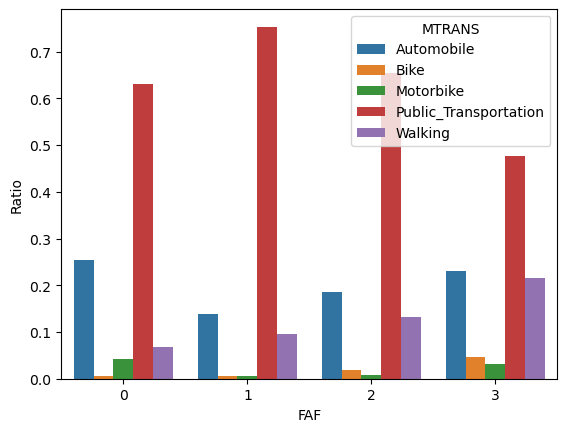

In [172]:
sns.barplot(data=df_agg, x='FAF', y='Ratio', hue='MTRANS')


<AxesSubplot: xlabel='MTRANS', ylabel='FAF'>

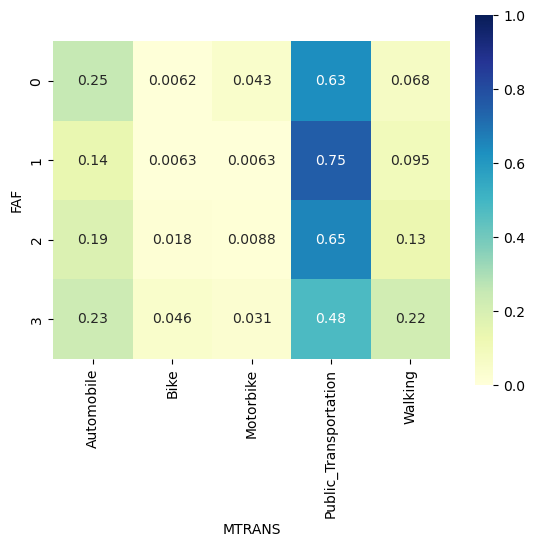

In [178]:
df_piv = df_agg.pivot(index='FAF', columns='MTRANS', values='Ratio')
df_piv
sns.heatmap(data=df_piv, square=True, cmap='YlGnBu', vmin=0, vmax=1, annot=True)

It doesn't show any useful information. The only stabily increasing value here is walking, meaning, respondents with more physical activity are more likely
to walk somewhere instead of using any other form of transportation. Overall, public transportation is used the most as a way of transportation.

In [179]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMINum,BMI
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight,1,24.386526
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,1,24.238227
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight,1,23.765432
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I,2,26.851852
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,3,28.342381


### 7. What is the effect on physical activity and drinking alcohol on BMI?

In [206]:
df_agg = df.groupby(['FAF', 'CALC']).BMI.describe().reset_index()
df_agg

,FAF,CALC,count,mean,std,min,25%,50%,75%,max
0,0,Frequently,13.0,27.918460,3.870075,22.600263,25.469388,27.166919,29.000595,36.157025
1,0,Sometimes,87.0,24.882904,5.389088,17.301038,20.548227,24.114038,27.190938,41.913215
2,0,no,62.0,25.291298,5.215224,15.822159,21.494167,24.127693,28.822025,40.644506
3,1,Always,1.0,22.491349,NaN,22.491349,22.491349,22.491349,22.491349,22.491349
4,1,Frequently,16.0,26.924432,4.482403,20.199470,24.161526,26.246618,30.341591,35.918367
5,1,Sometimes,85.0,24.252538,3.895907,16.229206,21.773842,24.163265,26.672763,35.264757
6,1,no,56.0,23.143813,3.926177,16.326531,20.563730,22.566771,24.500885,34.086605
7,2,Frequently,11.0,23.867384,3.661978,17.941817,21.991146,24.221453,25.826720,30.555556
8,2,Sometimes,71.0,23.888012,5.391329,15.432099,20.874450,22.892820,25.330608,49.472390
9,2,no,31.0,22.874103,5.004061,16.937032,19.357937,21.484375,24.565953,35.003199


<AxesSubplot: title={'center': 'Median BMI of physical activity and drinking alcohol'}, xlabel='FAF', ylabel='CALC'>

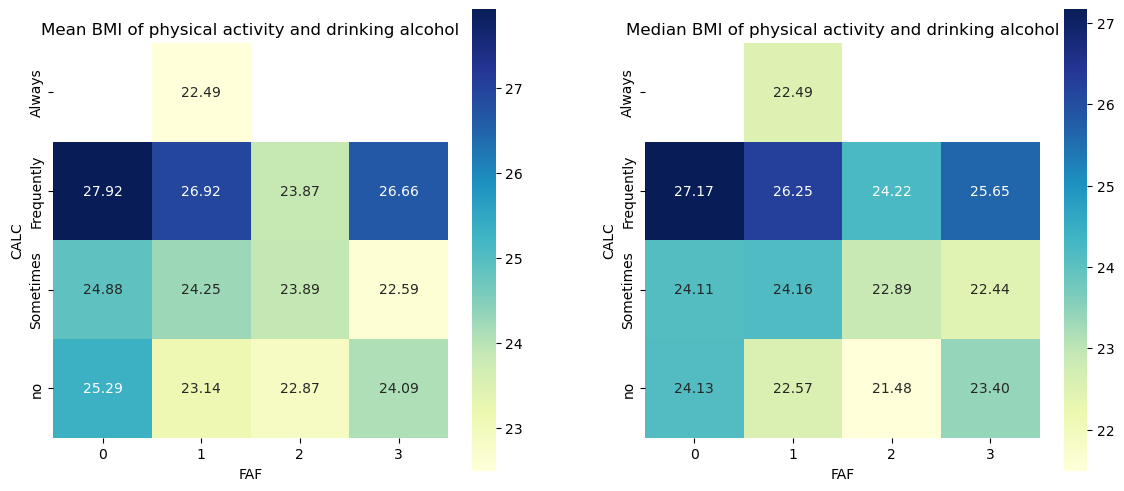

In [208]:
fix, axes = plt.subplots(1, 2, figsize=(14, 6))

ax = sns.heatmap(data=df_agg.pivot(index='CALC', columns='FAF', values='mean'), cmap='YlGnBu', ax=axes[0], annot=True, square=True, fmt='.2f')
ax.set(title='Mean BMI of physical activity and drinking alcohol')
plt.title('Median BMI of physical activity and drinking alcohol')
sns.heatmap(data=df_agg.pivot(index='CALC', columns='FAF', values='50%'), cmap='YlGnBu', ax=axes[1], annot=True, square=True, fmt='.2f')

The heatmap shows that respondents that drink frequently do have higher mean and median values of their BMI.

### 8. Is there any effect on using technological devices and physical activity?

In [210]:
df.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMINum,BMI
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight,1,24.386526
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,1,24.238227


In [216]:
cols = ['FAF', 'TUE']
df_agg = df.groupby(cols).FAF.count().reset_index(name='Count')
df_agg

,FAF,TUE,Count
0,0,0,84
1,0,1,47
2,0,2,31
3,1,0,75
4,1,1,64
5,1,2,19
6,2,0,52
7,2,1,50
8,2,2,11
9,3,0,32


<AxesSubplot: xlabel='FAF', ylabel='Count'>

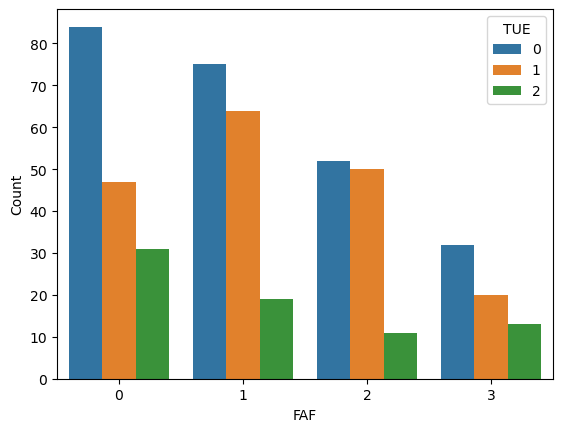

In [220]:
sns.barplot(data=df_agg, x='FAF', y='Count', hue='TUE')

We see a clear trend, that the more physical activity people do, the less time with devices they spend.

### 9. What is the trend in number of meals, consuming high calorie meals and vegetables on BMI?

In [285]:
cols = ['FAVC', 'FCVC', 'NCP']
df_agg = df.groupby(cols).BMI.agg(['count', 'median', 'mean']).reset_index()
df_agg

,FAVC,FCVC,NCP,count,median,mean
0,no,1,1,1,18.800000,18.800000
1,no,1,3,3,24.419279,23.649531
2,no,2,1,14,25.811173,25.548947
3,no,2,3,59,24.163265,24.923829
4,no,2,4,6,21.733169,22.011830
5,no,3,1,10,24.167746,23.904728
6,no,3,3,48,23.907911,23.930657
7,no,3,4,9,23.087868,24.384074
8,yes,1,1,3,25.076193,26.483653
9,yes,1,3,22,23.367818,24.048142


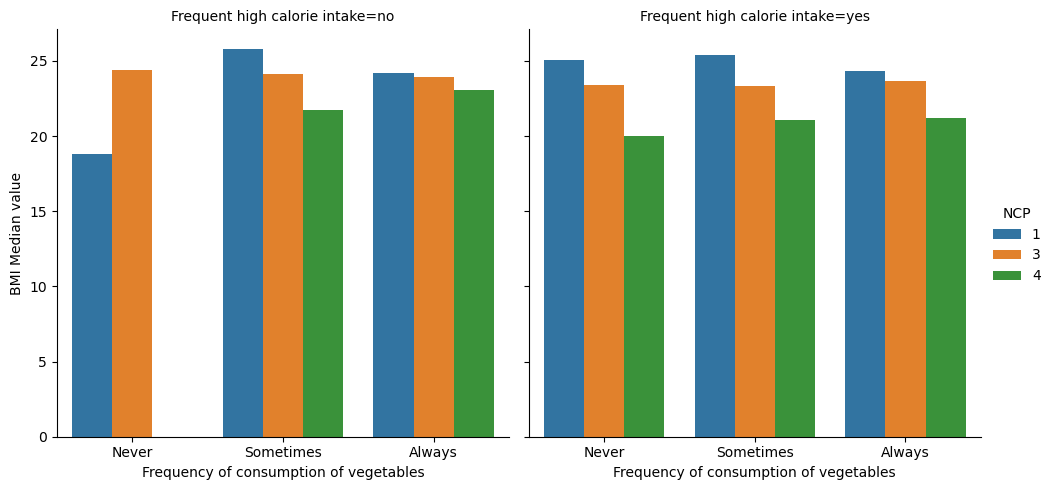

In [281]:
g = sns.catplot(data=df_agg, x='FCVC', y='Count', col="FAVC", hue='NCP', kind='bar')

g.set_axis_labels("Frequency of consumption of vegetables", "BMI Median value")
g.set_xticklabels(['Never','Sometimes', 'Always'])
g.set_titles("Frequent high calorie intake={col_name}")


Looking at the cat plot it seems that frequency on consumption of vegetables has little effect on BMI, but what it surprising is that the more meals every per day
is consumed the lower the BMI seems to be

### 10. Is there any effect on physical activity and monitoring calorie intake?

In [300]:
df.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMINum,BMI
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight,1,24.386526
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,1,24.238227


In [310]:
df_agg = (df.groupby(['FAF', 'SCC']).SCC.count() / df.groupby('FAF').SCC.count()).reset_index(name='Ratio')
df_agg

,FAF,SCC,Ratio
0,0,no,0.950617
1,0,yes,0.049383
2,1,no,0.905063
3,1,yes,0.094937
4,2,no,0.831858
5,2,yes,0.168142
6,3,no,0.800000
7,3,yes,0.200000


[Text(0, 0, 'No PA'),
 Text(1, 0, '1-2 Days'),
 Text(2, 0, '2-4Days'),
 Text(3, 0, '5+Days')]

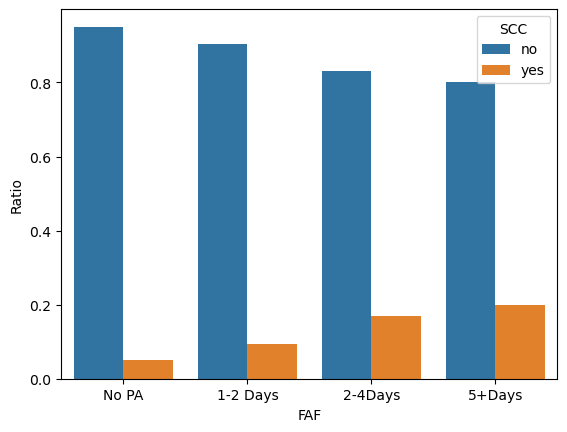

In [315]:
g = sns.barplot(data=df_agg, x='FAF', hue='SCC', y='Ratio')
g.set_xticklabels(['No PA','1-2 Days', '2-4Days', '5+Days'])

It seems that there is a small trend, that the more people have Physical activity, the more they try to track their calorie intake.

### 11. Are there any differences in gender and smoking?

In [316]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMINum,BMI
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight,1,24.386526
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,1,24.238227
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight,1,23.765432
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I,2,26.851852
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,3,28.342381


In [322]:
df_agg = (df.groupby(['Gender', 'SMOKE']).SMOKE.count() / df.groupby('Gender').SMOKE.count()).reset_index(name='SmokeRatio')
df_agg

,Gender,SMOKE,SmokeRatio
0,Female,no,0.933921
1,Female,yes,0.066079
2,Male,no,0.937269
3,Male,yes,0.062731


<AxesSubplot: xlabel='Gender', ylabel='SmokeRatio'>

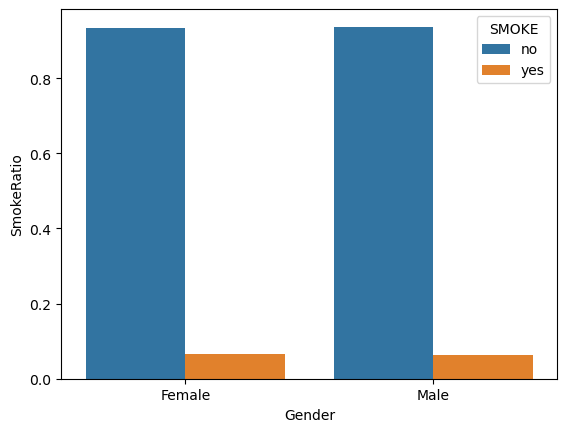

In [324]:
sns.barplot(data=df_agg, x='Gender', hue='SMOKE', y='SmokeRatio')

There is no effect on smoking based on gender.

### 12. Are there any differences in gender and number of meals per day?

In [332]:
df_agg = (df.groupby(['Gender', 'NCP']).NCP.count() / df.groupby(['Gender']).NCP.count()).reset_index(name='MealRatio')
df_agg

,Gender,NCP,MealRatio
0,Female,1,0.277533
1,Female,3,0.643172
2,Female,4,0.079295
3,Male,1,0.166052
4,Male,3,0.730627
5,Male,4,0.103321


<AxesSubplot: xlabel='Gender', ylabel='MealRatio'>

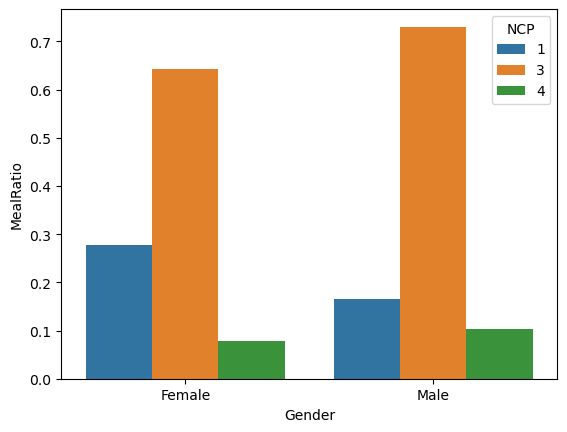

In [333]:
sns.barplot(data=df_agg, x='Gender', hue='NCP', y='MealRatio')

We can see that in both genders 3 main meals per day is the most common answer, but females do have a bit higher ratio of just 1 to 2 meals per day, while men have higher ratio
in having more than 3 main meals per day

### 13. Is there any effect of drinking alcohol on smoking?

In [353]:
df_agg = (df.groupby(['CALC', 'SMOKE']).SMOKE.count() / df.groupby('CALC').SMOKE.count()).reset_index(name='Ratio')
df_piv = df_agg.pivot(index='CALC', columns='SMOKE', values='Ratio')
df_piv


SMOKE,no,yes
CALC,,
Always,1.000000,NaN
Frequently,0.844444,0.155556
Sometimes,0.930403,0.069597
no,0.966480,0.033520


<AxesSubplot: xlabel='SMOKE', ylabel='CALC'>

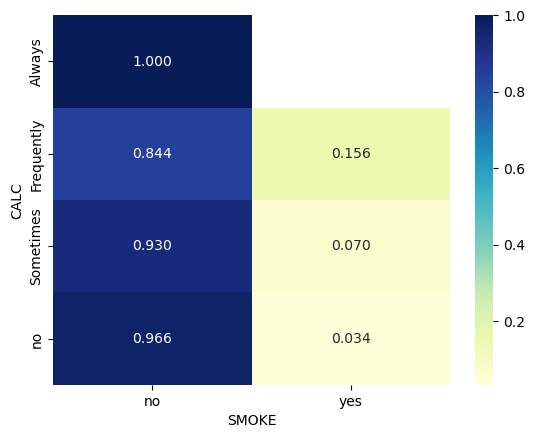

In [356]:
sns.heatmap(data=df_piv, cmap='YlGnBu', annot=True, fmt='.3f')

It seems there is a going trend, that people who drink alcohol more frequently also smoke more

### 14. Does family history of overweight have effect on time spent using technological devices?

In [363]:
df_agg = (df.groupby(['family_history_with_overweight', 'TUE']).TUE.count() / df.groupby(['family_history_with_overweight']).TUE.count()).reset_index(name='Ratio')
df_agg

,family_history_with_overweight,TUE,Ratio
0,no,0,0.500000
1,no,1,0.383838
2,no,2,0.116162
3,yes,0,0.480000
4,yes,1,0.350000
5,yes,2,0.170000


<AxesSubplot: xlabel='family_history_with_overweight', ylabel='Ratio'>

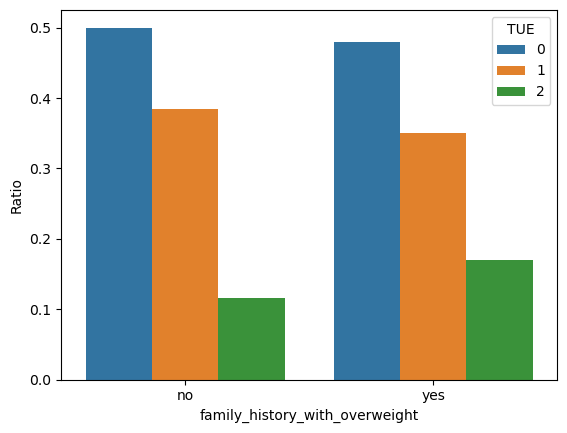

In [365]:
sns.barplot(data=df_agg, x='family_history_with_overweight', y='Ratio', hue='TUE')

Based on barplot is seems that where family has history with overweight respondents are more likely to spend more time per day on devices, but the difference does not seem to be significant

### 15. Does consumption of food between main meals lower main meals per day?

In [388]:
cols = ['NCP', 'CAEC']
df_agg = (df.groupby(cols).NCP.count() / df.groupby(cols[1]).NCP.count()).reset_index(name='Ratio')
df_agg

,NCP,CAEC,Ratio
0,1,Always,0.188679
1,1,Frequently,0.132353
2,1,Sometimes,0.249135
3,1,no,0.400000
4,3,Always,0.622642
5,3,Frequently,0.676471
6,3,Sometimes,0.716263
7,3,no,0.600000
8,4,Always,0.188679
9,4,Frequently,0.191176


In [389]:
df_piv = df_agg.pivot(index='CAEC', columns='NCP', values='Ratio')

<AxesSubplot: xlabel='NCP', ylabel='CAEC'>

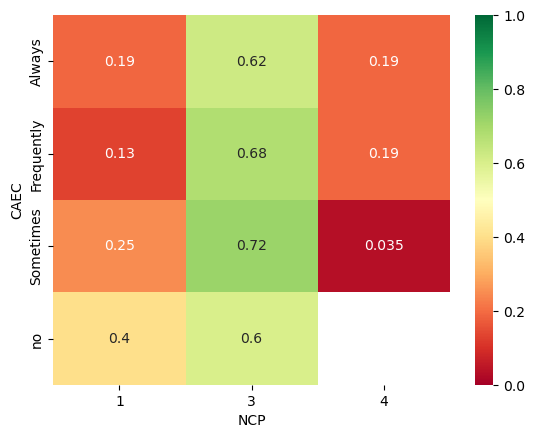

In [390]:
sns.heatmap(df_piv, annot=True, cmap='RdYlGn', vmin=0, vmax=1)

<AxesSubplot: xlabel='CAEC', ylabel='Ratio'>

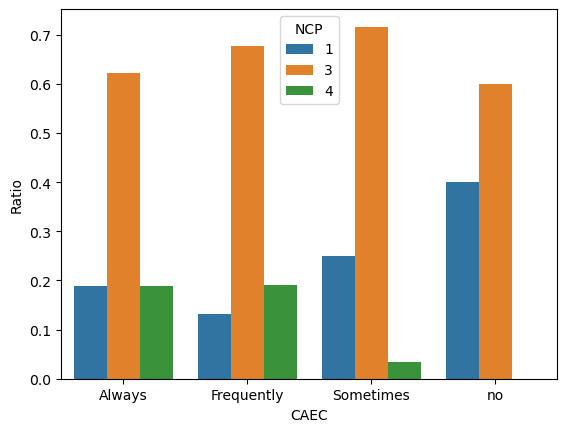

In [391]:
sns.barplot(data=df_agg, x='CAEC', hue='NCP', y='Ratio')

In [393]:
df.groupby('CAEC').NCP.describe(include='all')

,count,mean,std,min,25%,50%,75%,max
CAEC,,,,,,,,
Always,53.0,2.811321,0.961901,1.0,3.0,3.0,3.0,4.0
Frequently,136.0,2.926471,0.848811,1.0,3.0,3.0,3.0,4.0
Sometimes,289.0,2.536332,0.904979,1.0,3.0,3.0,3.0,4.0
no,20.0,2.200000,1.005249,1.0,1.0,3.0,3.0,3.0


There seem to be no clear distinction if eating food between meals increase or decrease the number of meals per day

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='CAEC', ylabel='BMI'>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


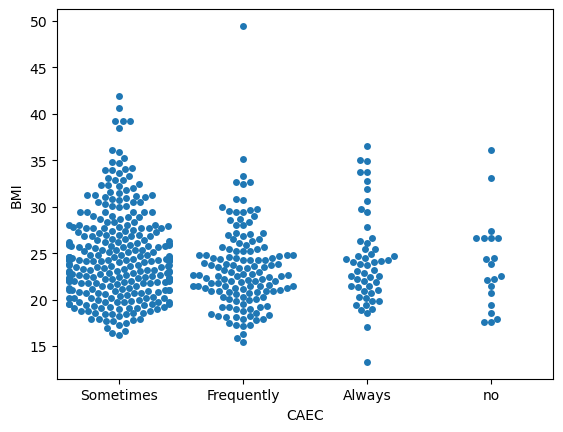

In [398]:
sns.swarmplot(data=df, x='CAEC', y='BMI')